In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
iris = load_iris()
samples = iris.data
model = KMeans(n_clusters = 3)
model.fit(samples)
labels = model.predict(samples)

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

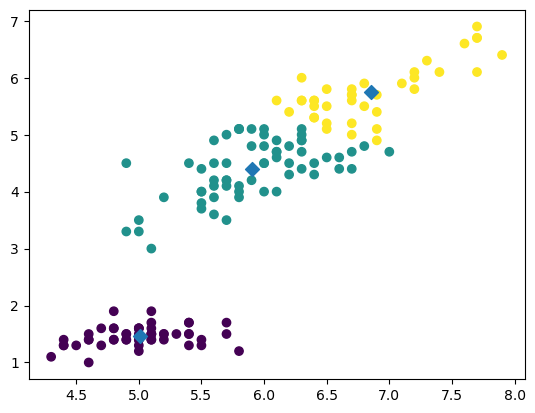

In [8]:
#plottting sepal length and petal length
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs,ys,c=labels)
centroids=model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y= centroids[:,2]
plt.scatter(centroids_x,centroids_y,marker = 'D',s = 50)
plt.show

Analysing seeds data from UCI

In [9]:
seeds = pd.read_csv('Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [10]:
seed_dict= {
    0:'Kama',
    1:'Rosa',
    2:'Canadian',
}
seed_list = seeds['target'].map(seed_dict).tolist()

In [11]:
#Preparing seeds for clustering by dropping the target column

seeds = seeds.drop(['target'],axis=1)
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\A

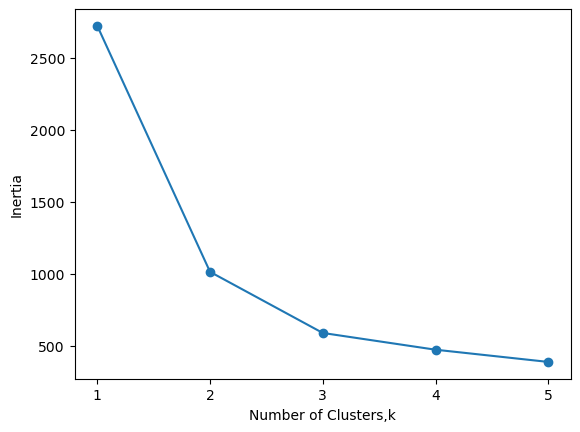

In [14]:
ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(seeds)
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of Clusters,k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

#Inertia decreases from 3 to 4 very slowly , so 3 can be a good choice

In [15]:
model = KMeans(n_clusters = 3)
seed_labels = model.fit_predict(seeds)
centroids = model.cluster_centers_
centroids

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

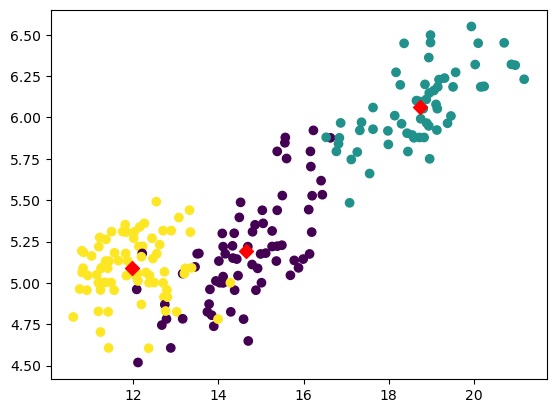

In [17]:
# A vs LKG
xs_A = seeds.iloc[:,0]
ys_LKG = seeds.iloc[:,-1]
centroids_xs_A = centroids[:,0]
centroids_ys_LKG = centroids[:,-1]
plt.scatter(xs_A,ys_LKG,c = seed_labels)
plt.scatter(centroids_xs_A,centroids_ys_LKG,marker = 'D',s=50,c='red')
plt.show()